# Investigating Fandango Movie Ratings: 

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

In this project, **we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis**.

## Exploring the data
We will use publically available data from the following sources for analysis:
* Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system *previous* to his analysis. The file will be read into a dataframe called `before`.
* One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics *after* Hickey's analysis. The file will be read into a dataframe called `after`.

In [1]:
# importing libraries we'll use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Turn off FutureWarning notification
# Turn off SettingWithCopyWarning notification
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning) 

# display plots in the notebook
%matplotlib inline

# set plot background colors
sns.set_style('white')

# reading the data into a dataframes
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

# Exploring the before dataset
before.info()
before.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
# Exploring the after dataset
after.info()
after.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


## Isolating relevant columns
We'll isolate columns pertaining to Fantango's ratings in separate variables.

In [3]:
# filtering (f) columns for each dataset
f_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                        'Fandango_votes', 'Fandango_Difference']]
f_after = after[['movie', 'year', 'fandango']]

f_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [4]:
f_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.
## Was the data sampled randomly?

We can see from [Hickey's repository](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) that he sampled movies that:
* had at least 30 fan ratings at the time of sampling (Aug. 24 2015).
* had tickets on sale in 2015.

Given this, we can see his data was not sampled randomly, as not all movies had a chance to be included in his analysis (movies with less than 30 fan ratings and no tickets on sale in 2015). The sample isn't entirely representative of the population we want to analyze, since it's subject to *temporal trends*  &#151; meaning movies in 2015 could have been either exceptionally bad or good compared to other years.

According to the [repository of the dataset gathered by Dataquest sometime after](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md), movies were sampled that:
* were released in 2016 or after.
* had a considerable number of votes. The exact number is not clear.

Again, the movies sampled may not be representative of the whole movie population we are interested in due to the unknown voting criteria.

The authors of the datasets used what is known as [purposive sampling](https://www.alchemer.com/resources/blog/purposive-sampling-101/), which is a non-probalistic form of sampling that can introduce researcher bias. While the data may have been useful for these authors' questions, it may not be useful for us.

## Changing the goal of our analysis
Since these datasets don't describe our population of interest (all the movie ratings on Fandango), we can either collect new data or change the goal of our analysis. 

Changing our goal is faster and more practical compared to collecting new data. Therefore, instead of determining whether there's been a change in Fandango's movie ratings after Hickey's analysis, our new goal is to determine if there's a difference in Fandago's ratings for popular movies in 2015 and 2016. This will serve as a good proxy to our original goal.

## Isolating the data for our new goal
We now have two populations to compare:
* Ratings for popular movies released in 2015
* Ratings for popular movies released in 2016

We'll use Hickey's benchmark of 30 fan ratings or more to define a movie as "popular."

The dataset collected by Dataquest, `f_after`, needs to be checked to see if it meets Hickey's "popular" criteria. We'll sample 10 random movies from the data and manually check Fandango to ensure that at least 80% 
(8 out of 10) of the movies have at least 30 fan ratings or more.

In [5]:
f_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


We used `random_state=1` to show we didn't just cycle through samples until we found a favorable sample.

These are the number of fan ratings as of April 2018:

|                                   Movie | # of Ratings |
|----------------------------------------:|-------------:|
| Mechanic: Resurrection                  | 2247         |
| Warcraft                                | 7271         |
| Max Steel                               | 493          |
| Me Before You                           | 5263         |
| Fantastic Beasts and Where to Find Them | 13400        |
| Cell                                    | 17           |
| Genius                                  | 127          |
| Sully                                   | 11877        |
| A Hologram for the King                 | 500          |
| Captain America: Civil War              | 35057        |

9 out of 10 (90%) movies meet the "popular" criteria of 30 or more fan ratings. We can move ahead with this data with confidence.

We'll now isolate movies released in 2015 for Hickey's dataset stored in `f_before` and movies released in 2016 for Dataquest's dataset stored in `f_after`.

In [6]:
f_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [7]:
# Creat a new year column by extracting the year from the FILM column
f_before['Year'] = f_before['FILM'].str.extract(r'\((\d{4})\)').astype(int)

f_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [8]:
f_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

We'll remove the 17 movies from 2014

In [9]:
f_2015 = f_before[f_before['Year'] == 2015].copy()
f_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [10]:
f_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

We'll remove the 23 movies from 2017

In [11]:
f_2016 = f_after[f_after['year'] == 2016].copy()

f_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing 2015 and 2016 distributions

We'll now compare the distributions of Fandango popular movie ratings for 2015 and 2016 by generating kernal density plots for each sample.

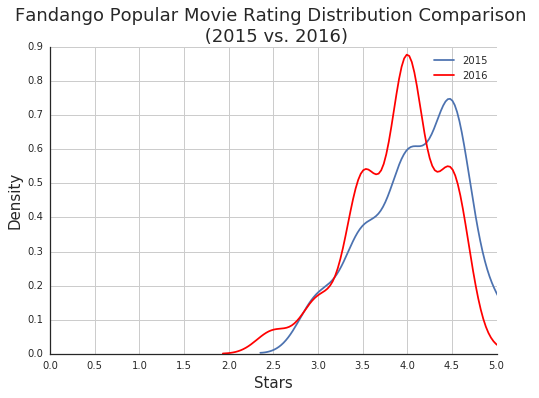

In [12]:
# Plot the Fandango popular movie ratings from 2015 and 2016 on the same figure
from numpy import arange

fig = plt.figure(figsize=(8,5.5))

sns.kdeplot(f_2015['Fandango_Stars'], label='2015')
sns.kdeplot(f_2016['fandango'], label='2016', color='r')

sns.despine(top=True, right=True)

plt.title('Fandango Popular Movie Rating Distribution Comparison \n (2015 vs. 2016)', size=18)
plt.xlabel('Stars', size=15)
plt.ylabel('Density', size=15)
plt.xlim(0, 5)
plt.xticks(arange(0, 5.1, 0.5))
plt.grid()
plt.show()

Both distributions are left skewed, which is suggestive of Fandango's inflated ratings to promote the sale of movie tickets. 

Additionally, the 2016 distribution is slightly shifted left relative to the 2015 distribution, indicating that **Fandango ratings for popular movies in 2016 were slightly lower than those in 2015**.

## Comparing relative frequencies
While the kernal density plots showed us there's a difference between the two distributions, we still need to analyze more granular information. We'll examine the relative frequency of movie ratings for each sample next.

In [13]:
print('2015' + '\n' + '-' * 16)
# Generate relative frequency table
f_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
print('2016' + '\n' + '-' * 16)
# Generate relative frequency table
f_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

([<matplotlib.axis.YTick at 0x7f1418150320>,
 <a list of 9 Text yticklabel objects>)

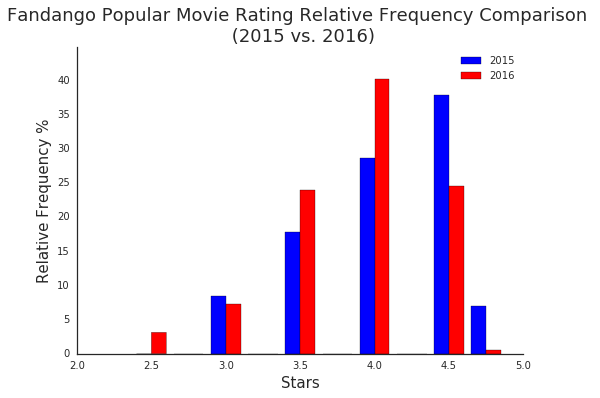

In [15]:
# Plot relative frequencies of each distrbution on same figure
fig, ax = plt.subplots(figsize=(8,5.5))


ax = plt.hist(x=[f_2015['Fandango_Stars'], f_2016['fandango']],
         label=['2015', '2016'], color=['b','r'], normed=True, align='left')

sns.despine(top=True, right=True)

plt.legend(loc='best')
plt.title('Fandango Popular Movie Rating Relative Frequency Comparison \n (2015 vs. 2016)', size=18)
plt.xlabel('Stars', size=15)
plt.ylabel('Relative Frequency %', size=15)
plt.yticks(arange(0,1.8,.2), arange(0,100,5)) # To display y-axis percentages properly
plt.show()

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determining the direction of the difference between movie rating distributions


In [16]:
# Calculate the mean, median, and mode of movie ratings for each year
mean_2015 = f_2015['Fandango_Stars'].mean()
mean_2016 = f_2016['fandango'].mean()

median_2015 = f_2015['Fandango_Stars'].median()
median_2016 = f_2016['fandango'].median()

mode_2015 = f_2015['Fandango_Stars'].mode()[0]
mode_2016 = f_2016['fandango'].mode()[0]

# New dictionary containing summary statistics
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']

# Display new dictionary
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


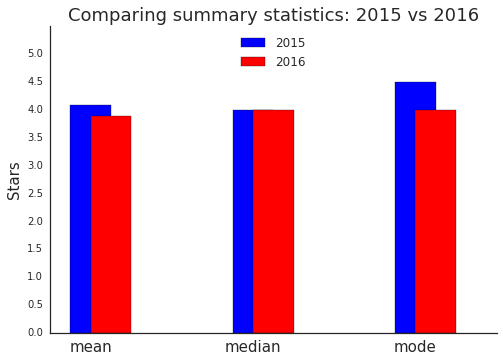

In [29]:
# Plot summary statistics for each year on the same figure
fig, ax = plt.subplots(figsize=(8,5.5))

ax = summary['2015'].plot.bar(color = 'b', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'r', align = 'edge', label = '2016', width = .25,
                         rot = 0, ax=ax)

sns.despine(top=True, right=True)

plt.title('Comparing summary statistics: 2015 vs 2016', size=18)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars', size=15)
plt.xticks(size=15)
plt.legend(framealpha = 0, loc = 'upper center', fontsize=12)
plt.show()

While the median was the same for Fandango popular movie ratings, both the mode and mean rating were slightly lower in 2016 than in 2015.

In [38]:
100 * ((summary.loc['mean']['2015'] - summary.loc['mean']['2016']) / summary.loc['mean']['2015'])

4.842683568951993

There was an approximately 5% drop in the mean rating from 2015 to 2016

## Conclusion
We analyzed Fandango movie ratings for popular movies to determine whether there was a change in movie ratings betweeen 2015 and 2016.

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.